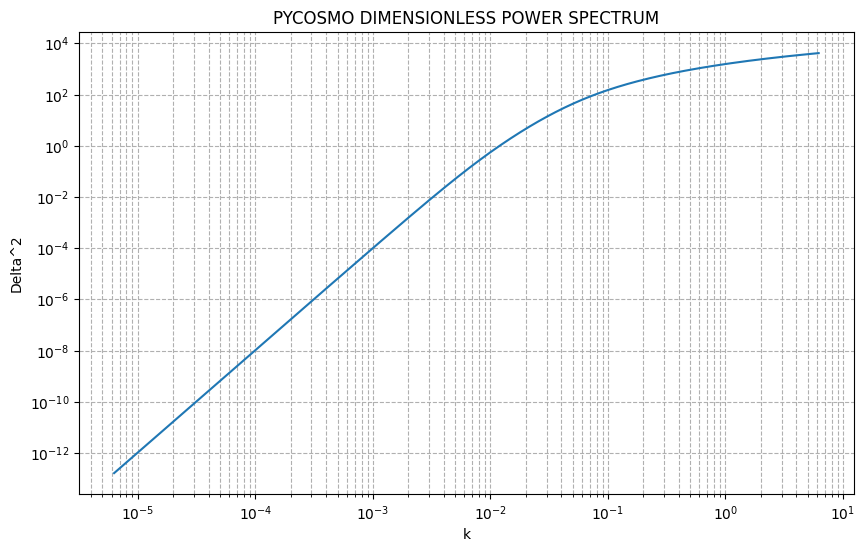

In [183]:
import numpy as np
import pandas

import matplotlib.pyplot as plt

# Load data from the file
data = np.loadtxt('512_input_spectrum.txt')

# If the file has two columns: frequency and amplitude
if data.ndim == 2 and data.shape[1] == 2:
    log_pycosmo_wave_numbers = data[:, 0]
    log_pycosmo_delta_squared = data[:, 1]
else:
    # If the file has only one column (amplitude), use index as x
    log_pycosmo_wave_numbers= np.arange(len(data))
    log_pycosmo_delta_squared = data

plt.figure(figsize=(10, 6))
plt.plot(10**log_pycosmo_wave_numbers, 10**log_pycosmo_delta_squared)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('Delta^2')
plt.title('PYCOSMO DIMENSIONLESS POWER SPECTRUM')
plt.grid(True, which='both', ls='--')
plt.show()

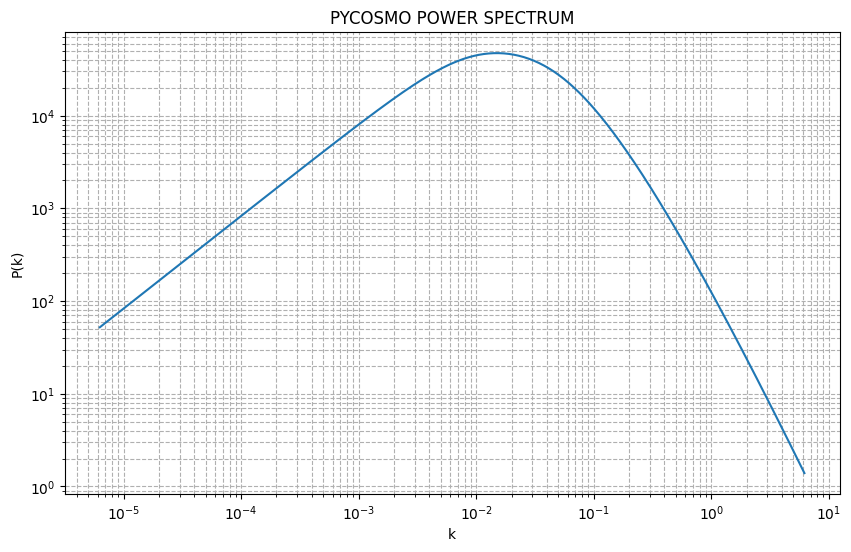

In [184]:
log_pycosmo_power_spectrum = (log_pycosmo_delta_squared - np.log10(4 * np.pi) - 3 * log_pycosmo_wave_numbers)
plt.figure(figsize=(10, 6))
plt.plot(10**log_pycosmo_wave_numbers, 10**log_pycosmo_power_spectrum)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('PYCOSMO POWER SPECTRUM')
plt.grid(True, which='both', ls='--')
plt.show()

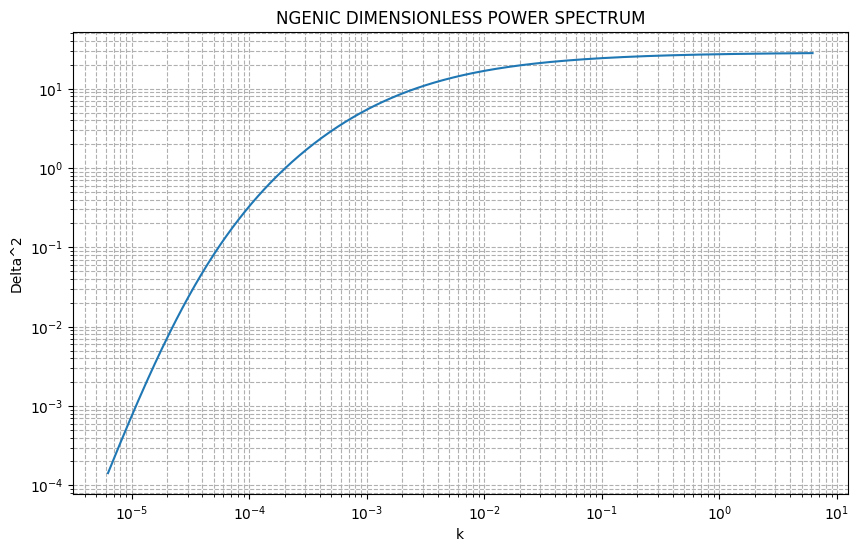

In [185]:
# Load the first two columns from 'inputspec_lsf_512.txt'
inputspec_data = np.loadtxt('inputspec_lsf_512.txt', usecols=(0, 1))

# Separate columns
ngenic_wave_numbers = inputspec_data[:, 0]
ngenic_delta_squared = inputspec_data[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(ngenic_wave_numbers, ngenic_delta_squared)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('Delta^2')
plt.title('NGENIC DIMENSIONLESS POWER SPECTRUM')
plt.grid(True, which='both', ls='--')
plt.show()

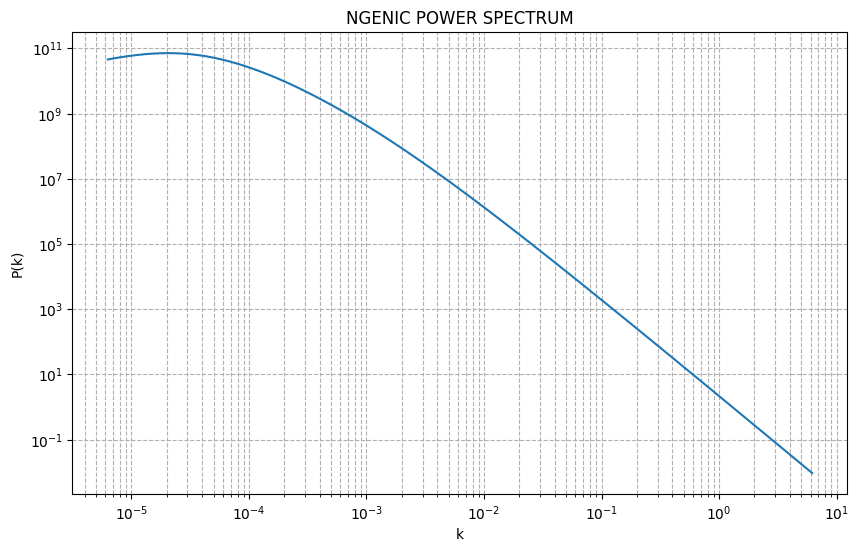

In [186]:
plt.figure(figsize=(10, 6))

ngenic_power_spec = (ngenic_delta_squared) / (4 * np.pi * (ngenic_wave_numbers)**(3))

plt.plot(ngenic_wave_numbers, ngenic_power_spec)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('NGENIC POWER SPECTRUM')
plt.grid(True, which='both', ls='--')
plt.show()

In [187]:
import pandas as pd

# Print the first two columns of 'inputspec_lsf_512.txt'
# Load the first two columns from 'inputspec_lsf_512.txt'
# Use x and y arrays, output in scientific notation

df = pd.DataFrame({'log10(k)': np.log10(ngenic_wave_numbers), 'log10(delta^2)': np.log10(ngenic_delta_squared)})

# Set pandas display option for scientific notation
pd.set_option('display.float_format', '{:.6e}'.format)

print(df)
df.to_csv('test_spectrum.txt', sep='\t', index=False, header=True, float_format='%.6e')


         log10(k)  log10(delta^2)
0   -5.201820e+00   -3.845719e+00
1   -5.191097e+00   -3.806405e+00
2   -5.180373e+00   -3.767187e+00
3   -5.169649e+00   -3.728066e+00
4   -5.158925e+00   -3.689041e+00
..            ...             ...
555  7.499248e-01    1.447338e+00
556  7.606494e-01    1.447456e+00
557  7.713729e-01    1.447572e+00
558  7.820969e-01    1.447687e+00
559  7.928209e-01    1.447800e+00

[560 rows x 2 columns]


In [188]:
diff = ngenic_delta_squared - 10**(log_pycosmo_delta_squared)
plt.plot(ngenic_wave_numbers, diff)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('ngenic_delta_squared - pycosmo_delta_squared')
plt.title('POWER SPECTRUM DIFFERENCE')
plt.grid(True, which='both', ls='--')
plt.show()

ValueError: operands could not be broadcast together with shapes (560,) (561,) 